### Student Information
Name: 朱晉輝

Student ID: r12944041

GitHub ID: CHINHUICHU

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

## Part 1

In [1]:
### Begin Assignment Here

# Exercise 2
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

# construct dataframe from a list
X = pd.DataFrame.from_records(format_rows(twenty_train), columns= ['text'])
X[X.index < 10]['text']

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

In [2]:
# exercise 5

# Answer: The isnull function checks whether the object is null.
# In the case of 'B', 'missing_example' is undefined, so it is considered a null value.
# 'A' and 'E' are explicitly set to null values (np.nan and None, respectively).
# For the other values, 'C' and 'D' are strings ('NaN' and 'None'), 
# which are not treated as null.
# In 'F', an empty string ('') is considered a non-null value by isnull().

In [3]:
# exercise 6

# The index in X_sample is not in order, and the length of X_sample will be determined by how much we sample. 
# Also, if we run .sample() multiple times, X_sample will be different each time.

In [4]:
X

text
0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
...                                                 ...
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...

[2257 rows x 1 columns]

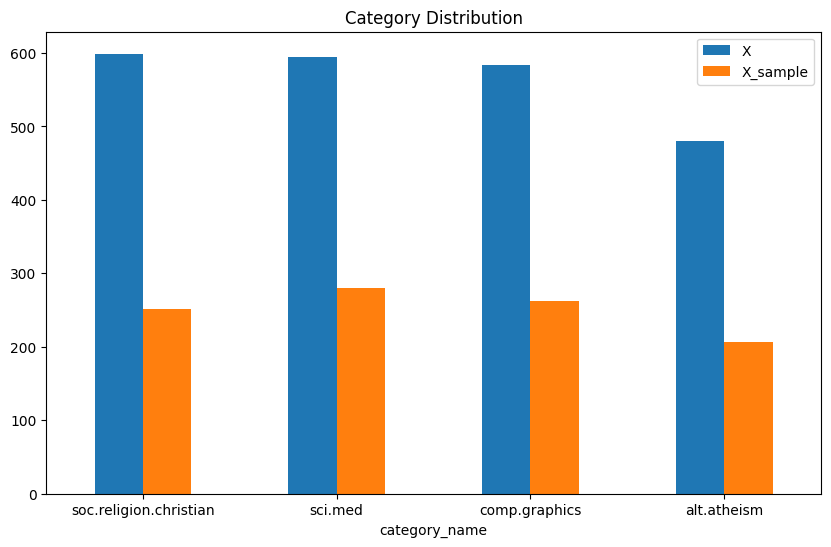

In [5]:
# exercise 8

# Answer 

import matplotlib.pyplot as plt

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]
    
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: format_labels(t, twenty_train))
X_sample = X.sample(n=1000)
vc_X = X['category_name'].value_counts()
vc_X_sample = X_sample['category_name'].value_counts()

combined = pd.concat([vc_X, vc_X_sample], axis=1, keys=['X', 'X_sample']).fillna(0)

combined.plot(kind='bar',
                      figsize=(10, 6),
                      rot=0, 
                      title='Category distribution')

plt.title('Category Distribution')
plt.show()

In [6]:
# exercise 10

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

X_array = X_counts[4:5, 0:100].toarray().flatten()
for i, v in enumerate(X_array):
    if v > 0 and i != 0:
        out = count_vect.get_feature_names_out()[i]
        break
out

'01'

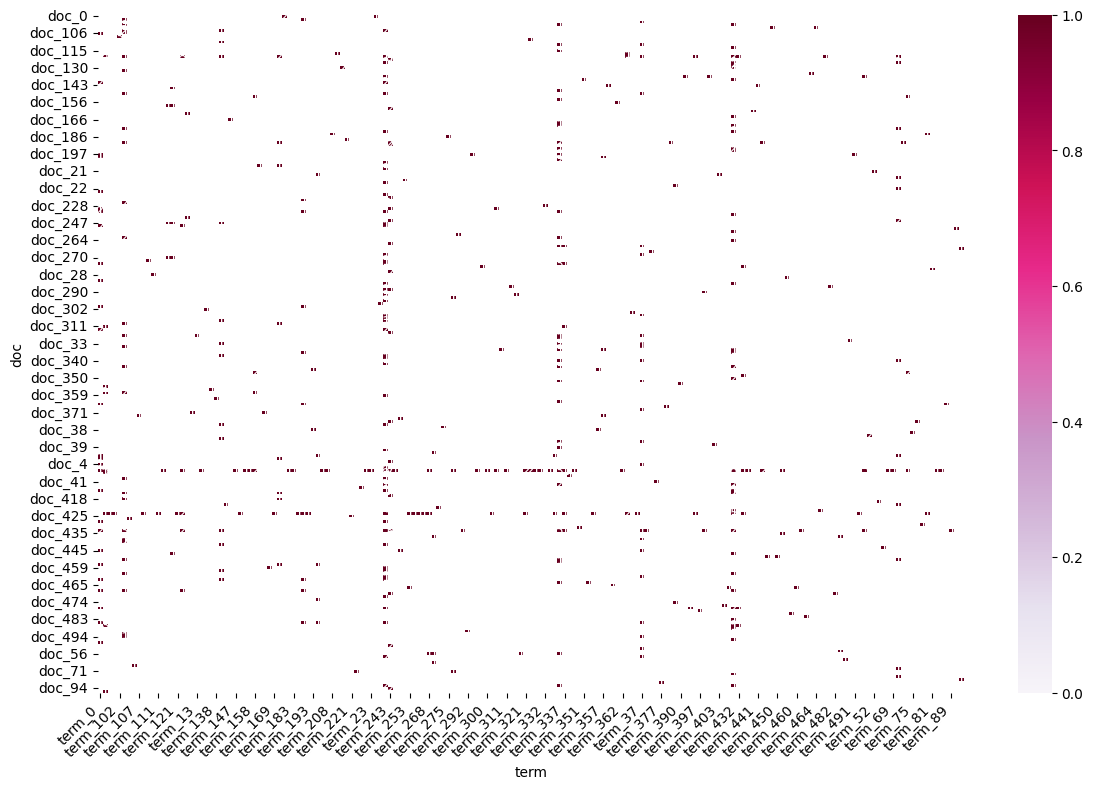

In [7]:
# exercise 11

import seaborn as sns

sparse_coo = X_counts[0:500, 0:500].tocoo() 
non_zero_mask = sparse_coo.data > 0

plot_data = {
    'doc': ["doc_" + str(sparse_coo.row[i]) for i in range(len(sparse_coo.data)) if non_zero_mask[i]],
    'term': ["term_" + str(sparse_coo.col[i]) for i in range(len(sparse_coo.data)) if non_zero_mask[i]],
    'value': [v for v in sparse_coo.data if v > 0]
}
df_sparse = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    pd.pivot_table(df_sparse, values='value', index='doc', columns='term'),
    cmap="PuRd",
    vmin=0, 
    vmax=1,
    annot=True,
    fmt='.2g'
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

In [8]:
# exercise 12

import plotly.express as px
import plotly.graph_objects as go
import numpy as np

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fig = go.Figure(data=[
    go.Bar(
        x=count_vect.get_feature_names_out()[:300],
        y=term_frequencies[:300],
        hovertemplate="<br>".join([
            "Term: %{x}",
            "Frequency: %{y}",
        ])
    )
])

fig.update_layout(
    title='Term Frequencies',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis_tickangle=-45,
    height=600,
    width=1200,
    showlegend=False,
    bargap=0.2
)

fig.show()

In [9]:
#exercise 13

min_freq = 5
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
mask = term_frequencies >= min_freq
filtered_terms = count_vect.get_feature_names_out()[mask]
filtered_frequencies = term_frequencies[mask]

sorted_indices = np.argsort(-filtered_frequencies)
sorted_terms = filtered_terms[sorted_indices]
sorted_frequencies = filtered_frequencies[sorted_indices]

N = 100
fig = px.bar(
    x=sorted_terms[:N],
    y=sorted_frequencies[:N],
    title=f'Top {N} Terms (Min Frequency: {min_freq})'
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=500,
    width=800
)
fig.show()

In [10]:
# exercise 14

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

min_freq = 5
mask = term_frequencies >= min_freq
filtered_terms = count_vect.get_feature_names_out()[mask]
filtered_frequencies = term_frequencies[mask]

sorted_indices = np.argsort(-filtered_frequencies)
sorted_terms = filtered_terms[sorted_indices]
sorted_frequencies = filtered_frequencies[sorted_indices]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(len(sorted_frequencies))),
    y=sorted_frequencies,
    mode='lines+markers',
    line=dict(width=2, color='rgb(31, 119, 180)'),
    marker=dict(size=6),
    hovertemplate="<br>".join([
        "Rank: %{x}",
        "Term: %{text}",
        "Frequency: %{y}",
        "<extra></extra>"
    ]),
    text=sorted_terms
))

fig.update_layout(
    title='Term Frequency Distribution (Linear Scale)',
    xaxis_title='Term Rank (by frequency)',
    yaxis_title='Frequency',
    height=600,
    width=1000,
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )
)

fig.show()

In [11]:
# exercise 15

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
min_freq = 5
mask = term_frequencies >= min_freq
filtered_terms = count_vect.get_feature_names_out()[mask]
filtered_frequencies = term_frequencies[mask]
sorted_indices = np.argsort(-filtered_frequencies)
sorted_terms = filtered_terms[sorted_indices]
sorted_frequencies = filtered_frequencies[sorted_indices]
log_frequencies = np.log1p(sorted_frequencies)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(len(log_frequencies))),
    y=log_frequencies,
    mode='lines+markers',
    line=dict(width=2, color='rgb(31, 119, 180)'),
    marker=dict(size=6),
    hovertemplate="<br>".join([
        "Rank: %{x}",
        "Term: %{text}",
        "Raw Frequency: %{customdata}",
        "Log Frequency: %{y:.2f}",
        "<extra></extra>"
    ]),
    text=sorted_terms,
    customdata=sorted_frequencies
))

fig.update_layout(
    title='Term Frequency Distribution (Log Scale)',
    xaxis_title='Term Rank (by frequency)',
    yaxis_title='Log Frequency (log(1 + x))',
    height=600,
    width=1000,
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )
)

fig.show()

In [12]:
# exercise 16

# High-frequency words appear in each category, indicating that there are common words regardless of the text category. 
# Meanwhile, the low-frequency words are different in each category, with a frequency of 1.

In [13]:
# erexcise 17

# top k FAE
# runtime
# k = 500 runtime: 0.6054308414459229
# k = 1000 runtine: 1.3083422183990479
# k = 1500 runtime: 3.681118965148926

# maxFPGrowth
# min support = 3
# Total No of patterns: 6872
# Runtime: 15.136601209640503
# min support = 6
# Total No of patterns: 1340
# Runtime: 0.2759127616882324
# min support = 9
# Total No of patterns: 660
# Runtime: 0.2745480537414551

# Comparing maxFPGrowth and FPGrowth, both algorithms show increased runtime as the minimum support decreases. 
# The number of patterns also increases with a decrease in minimum support. 
# While FPGrowth has a slower runtime compared to maxFPGrowth at the same minimum support level, it generates more patterns.
# The number of patterns in FPGrowth is significantly higher than in maxFPGrowth.

In [14]:
# exercise 18

# Findings: The data distribution appears slightly different when observed from various angles, yet it also looks similar when reduced to two dimensions. 
# This may indicate that adding a third dimension does not improve performance significantly.

# Note: Do not run the code below directly, as it has been copied from Lab1-Master 
# and lacks the prerequisite code. If you need to run the code, please go to the 
# repository: https://github.com/CHINHUICHU/DM2024-Lab1-Master


# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import umap
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
# X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
# X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# # Create a figure with 3 rows (one for each technique) and 3 columns (one for each angle)
# fig = plt.figure(figsize=(20, 18))

# # Define different viewing angles
# angles = [(30, 45), (30, 135), (60, 90)]
# titles = ['Front View', 'Side View', 'Top View']

# # Define colors and categories
# colors = ['coral', 'blue', 'black', 'orange']
# categories = X['category_name'].unique()

# # Function to create a scatter plot with specific viewing angle
# def create_3d_plot(data, row, col, angle, title, method_name):
#     ax = fig.add_subplot(3, 3, row * 3 + col + 1, projection='3d')
    
#     # Plot each category with its corresponding color
#     for color, category in zip(colors, categories):
#         mask = X['category_name'] == category
#         ax.scatter(data[mask, 0], data[mask, 1], data[mask, 2],
#                   c=color, marker='o', alpha=0.6, label=category)
    
#     ax.view_init(elev=angle[0], azim=angle[1])
#     ax.set_title(f'{method_name} - {title}')
#     ax.set_xlabel('First Component')
#     ax.set_ylabel('Second Component')
#     ax.set_zlabel('Third Component')
    
#     # Add grid and legend
#     ax.grid(True)
#     ax.legend(loc='upper right')
    
#     return ax

# methods = [
#     (X_pca_aug, 'PCA'),
#     (X_tsne_aug, 't-SNE'),
#     (X_umap_aug, 'UMAP')
# ]

# for row, (data, method_name) in enumerate(methods):
#     for col, (angle, title) in enumerate(zip(angles, titles)):
#         create_3d_plot(data, row, col, angle, title, method_name)

# plt.suptitle('Dimensionality Reduction Techniques from Different Angles', 
#              fontsize=16, y=0.95)
# plt.tight_layout()
# plt.show()

![Alt text](output.png)


In [15]:
# exercise 19

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# Not working, mlb needs to be changed to lb as shown in the following example

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 0, 0, 0]  
1           comp.graphics      [0, 0, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 0]  
3  soc.religion.christian      [0, 0, 0, 0]  
4  soc.religion.christian      [0, 0, 0, 0]  
5  soc.religion.christian      [0, 0, 0, 0]  
6  soc.religion.christian      [0, 0, 0, 0]  
7                 sci.med      [0, 0, 0, 0]  
8                 sci.med      [0, 0, 0, 0]

In [16]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
X['bin_category_name'] = lb.fit_transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

## Part 2

In [17]:
!pip install datasets

In [18]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

print(dataset)

/Users/chinhuichu/Documents/DM2024-Lab1-Homework/dm_hw1/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



DatasetDict({
    train: Dataset({
        features: ['sentiment', 'comment'],
        num_rows: 1500
    })
})


#### Data preparation

In [19]:
dataset['train'][0:2]

{'sentiment': ['not nostalgia', 'nostalgia'],
 'comment': ['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.',
  'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel']}

In [20]:
len(dataset['train'])

1500

In [21]:
len(dataset['train']['sentiment'])

1500

In [22]:
len(dataset['train']['comment'])

1500

In [23]:
print("\n".join(dataset['train']['comment'][0].split("\n")))

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.


In [24]:
print(dataset['train']['sentiment'][0])

not nostalgia


In [25]:
print(dataset['train']['sentiment'][0:10])

['not nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia']


In [26]:
for sentiment in dataset['train']['sentiment'][:10]:
    print(sentiment)

not nostalgia
nostalgia
nostalgia
not nostalgia
nostalgia
nostalgia
nostalgia
nostalgia
not nostalgia
not nostalgia


### Data Transformation

In [27]:
import pandas as pd

def format_rows(docs):
    """ Format the text field and strip special characters """
    D = []
    for d in docs['comment']:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

X = pd.DataFrame.from_records(format_rows(dataset['train']), columns=['comment'])

In [28]:
len(X)

1500

In [29]:
X[0:2]

comment
0  He was a singer with a golden voice that I lov...
1  The mist beautiful voice ever I listened to hi...

In [30]:
for t in X["comment"][:2]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


In [31]:
X['sentiment'] = dataset['train']['sentiment']

In [32]:
def format_labels(target):
    """ Format the labels to indicate if the sentiment is 'nostalgia' """
    return target == 'nostalgia'

# Apply the function to each element in the 'sentiment' column
X['is_nostalgia'] = X['sentiment'].apply(format_labels)

In [33]:
X[0:10]

comment      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   
9  Elvis will always be number one no one can com...  not nostalgia   

   is_nostalgia  
0         False  
1          True  
2          True  
3         False  
4          True  
5          True  
6          True  
7          True  
8         False  
9         False

In [34]:
X[:10][["comment", "is_nostalgia"]]

comment  is_nostalgia
0  He was a singer with a golden voice that I lov...         False
1  The mist beautiful voice ever I listened to hi...          True
2  I have most of Mr. Reeves songs.  Always love ...          True
3  30 day leave from 1st tour in Viet Nam to conv...         False
4  listening to his songs reminds me of my mum wh...          True
5  Every time I heard this song as a child, I use...          True
6  My dad loved listening to Jim Reeves, when I w...          True
7  i HAVE ALSO LISTENED TO Jim Reeves since child...          True
8           Wherever you  are you always in my heart         False
9  Elvis will always be number one no one can com...         False

In [35]:
X[-10:]

comment      sentiment  \
1490  He really isn't my cup of tea, but some of his...  not nostalgia   
1491  real music...how i miss those days...brings ba...      nostalgia   
1492  i used to cry over this song cause i had a boy...      nostalgia   
1493  He really has that "love you like a brother" l...  not nostalgia   
1494  That's funny. But Leo really is a nice guy. He...  not nostalgia   
1495  i don't know!..but the opening of the video,.....  not nostalgia   
1496  it's sad this is such a beautiful song when yo...  not nostalgia   
1497  Dear Friend, I think age and time is not that ...  not nostalgia   
1498  I was born in 1954 and started to be aware of ...      nostalgia   
1499  This is the first CD I bought after my marriag...      nostalgia   

      is_nostalgia  
1490         False  
1491          True  
1492          True  
1493         False  
1494         False  
1495         False  
1496         False  
1497         False  
1498          True  
1499          True

In [36]:
X.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [37]:
X.iloc[:10, 0]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

In [38]:
X[X.index < 10]['comment']

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

In [39]:
X.isnull()

comment  sentiment  is_nostalgia
0       False      False         False
1       False      False         False
2       False      False         False
3       False      False         False
4       False      False         False
...       ...        ...           ...
1495    False      False         False
1496    False      False         False
1497    False      False         False
1498    False      False         False
1499    False      False         False

[1500 rows x 3 columns]

In [40]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

X.isnull().apply(lambda x: check_missing_values(x))

comment                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                         is_nostalgia  
0  The amoung of missing records is:   
1                                   0

In [41]:
X.isnull().apply(lambda x: check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [42]:
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "sentiment"])
dummy_series

comment      dummy_record
sentiment               1
dtype: object

In [43]:
dummy_series.to_frame().T

comment sentiment
0  dummy_record         1

In [44]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

1501

In [45]:
result_with_series.isnull().apply(lambda x: check_missing_values(x))

comment                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                         is_nostalgia  
0  The amoung of missing records is:   
1                                   1

In [46]:
dummy_dict = [{'comment': 'dummy_record',
               'sentiment': 'not nostalgia'
              }]

In [47]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [48]:
len(X)

1501

In [49]:
X.isnull().apply(lambda x: check_missing_values(x))

comment                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                         is_nostalgia  
0  The amoung of missing records is:   
1                                   1

In [50]:
# Drop rows with NaN values in X
X.dropna(inplace=True)
X.isnull().apply(lambda x: check_missing_values(x))

comment                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                         is_nostalgia  
0  The amoung of missing records is:   
1                                   0

In [51]:
len(X)

1500

In [52]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [53]:
sum(X.duplicated())

1

In [54]:
sum(X.duplicated('comment'))

1

In [55]:
dummy_duplicate_dict = [{
                             'comment': 'dummy record',
                             'sentiment': 'nostalgi', 
                             'is_nostalgia': True
                        },
{
                             'comment': 'dummy record',
                             'sentiment': 'nostalgi', 
                             'is_nostalgia': True
                        }]
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
len(X)

1502

In [56]:
sum(X.duplicated())

2

In [57]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [58]:
len(X)

1498

### Data Preprocessing

In [59]:
X_sample = X.sample(n=1000)
len(X_sample)

1000

In [60]:
X_sample[0:4]

comment      sentiment  \
297                     Remembering when we were young.      nostalgia   
1411  My dad used to bath us in the 70s. We were all...      nostalgia   
228   From what I remember he used to sing with a te...      nostalgia   
438   i can sing this song without looking at lyrics...  not nostalgia   

     is_nostalgia  
297          True  
1411         True  
228          True  
438         False

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
print(X.is_nostalgia.value_counts())


is_nostalgia
True     750
False    748
Name: count, dtype: int64


<Axes: title={'center': 'Nostalgia distribution'}, xlabel='is_nostalgia'>

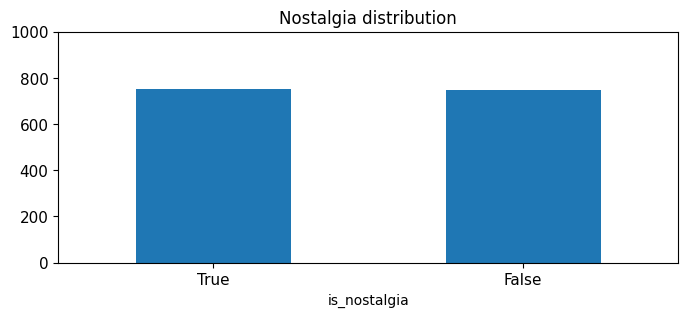

In [63]:
# plot barchart for X
X.is_nostalgia.value_counts().plot(kind = 'bar',
                                    title = 'Nostalgia distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

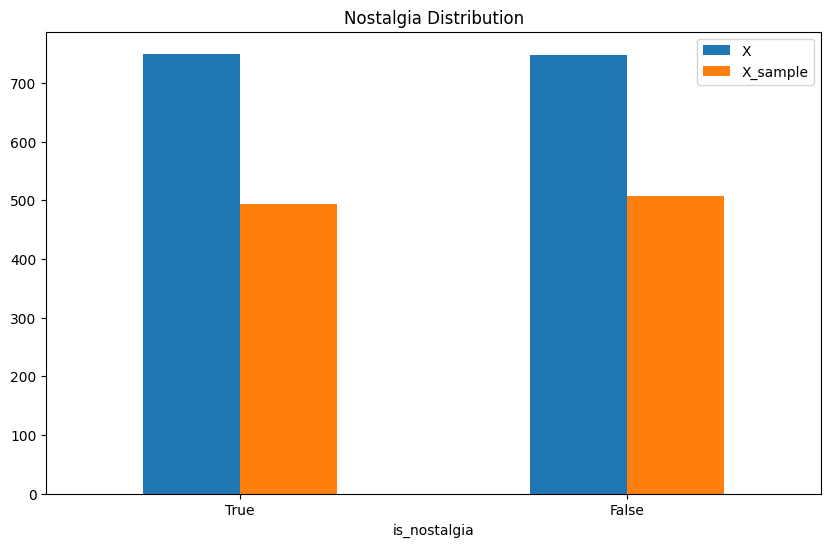

In [64]:
vc_X = X['is_nostalgia'].value_counts()
vc_X_sample = X_sample['is_nostalgia'].value_counts()

combined = pd.concat([vc_X, vc_X_sample], axis=1, keys=['X', 'X_sample']).fillna(0)

combined.plot(kind='bar',
                      figsize=(10, 6),
                      rot=0, 
                      title='Nostalgia distribution')

plt.title('Nostalgia Distribution')
plt.show()

### Feature Creation

In [65]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chinhuichu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [66]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

X['unigrams'] = X['comment'].apply(lambda x: tokenize_text(x))

In [67]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [68]:
X[0:4]

comment      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   

  is_nostalgia                                           unigrams  
0        False  [He, was, a, singer, with, a, golden, voice, t...  
1         True  [The, mist, beautiful, voice, ever, I, listene...  
2         True  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3        False  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [69]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### Feature subset selectioon

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment)
print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [71]:
count_vect.get_feature_names_out()[3000]

'skipper'

In [72]:
count_vect.get_feature_names_out()[2000]

'lock'

In [73]:
analyze = count_vect.build_analyzer()
X_counts.shape
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [74]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [75]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

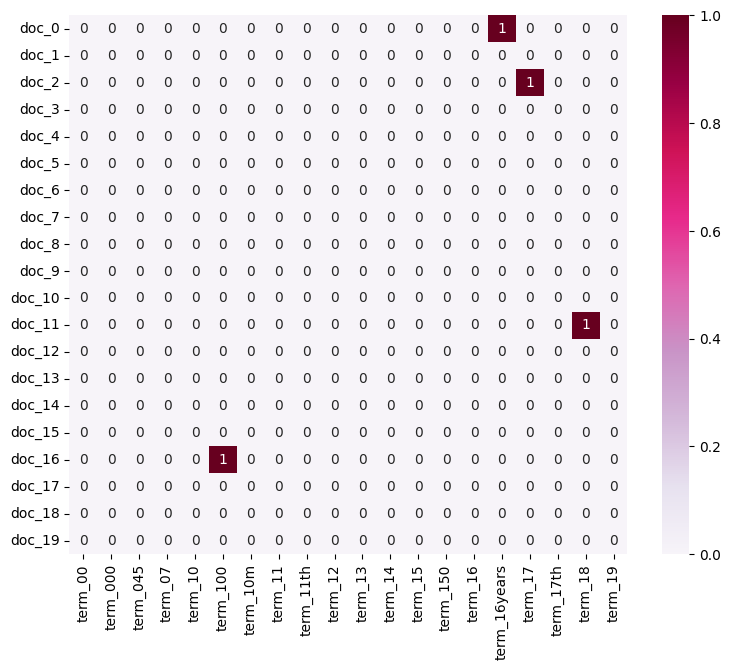

In [76]:
# selected term-document matrix for the first 20 record
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

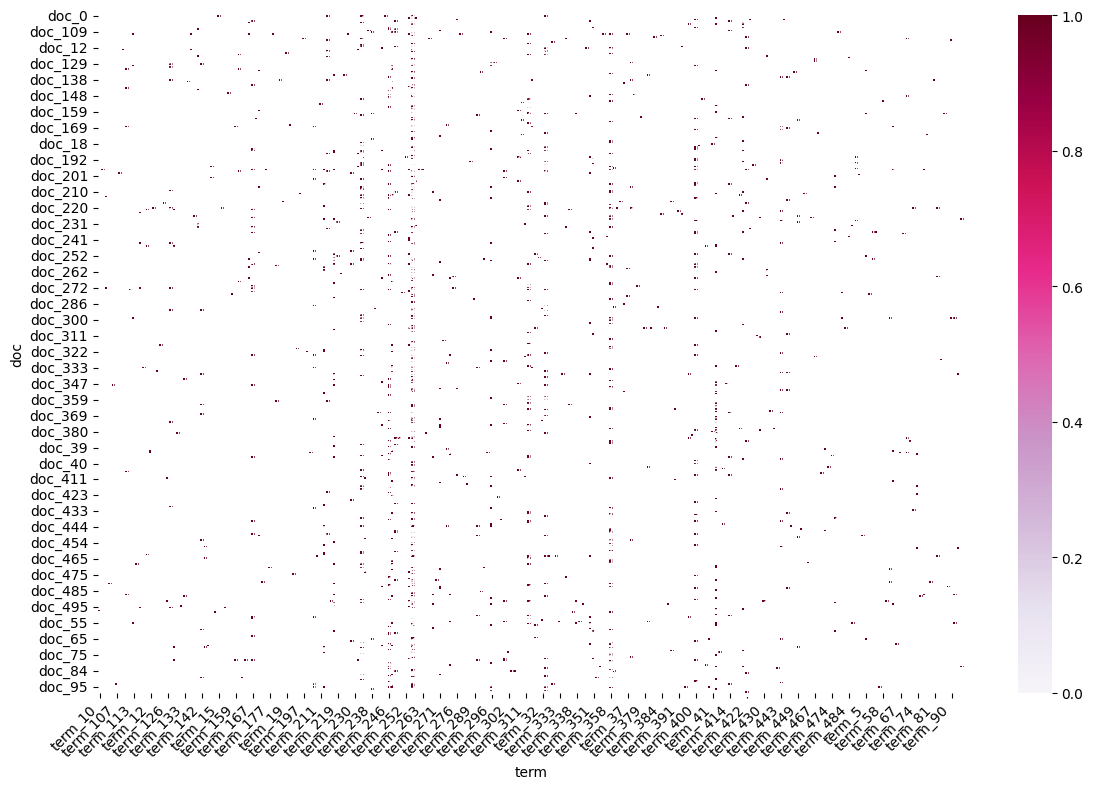

In [77]:
# sparse term-document matrix
sparse_coo = X_counts[0:500, 0:500].tocoo() 
non_zero_mask = sparse_coo.data > 0

plot_data = {
    'doc': ["doc_" + str(sparse_coo.row[i]) for i in range(len(sparse_coo.data)) if non_zero_mask[i]],
    'term': ["term_" + str(sparse_coo.col[i]) for i in range(len(sparse_coo.data)) if non_zero_mask[i]],
    'value': [v for v in sparse_coo.data if v > 0]
}
df_sparse = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    pd.pivot_table(df_sparse, values='value', index='doc', columns='term'),
    cmap="PuRd",
    vmin=0, 
    vmax=1,
    annot=True,
    fmt='.2g'
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

### Attribute Transformation/ Aggregation

In [78]:
import numpy as np

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_frequencies[0]

np.int64(1)

/var/folders/63/g1gt105s5kgc7h5cg6gzfv640000gn/T/ipykernel_12568/3140323867.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

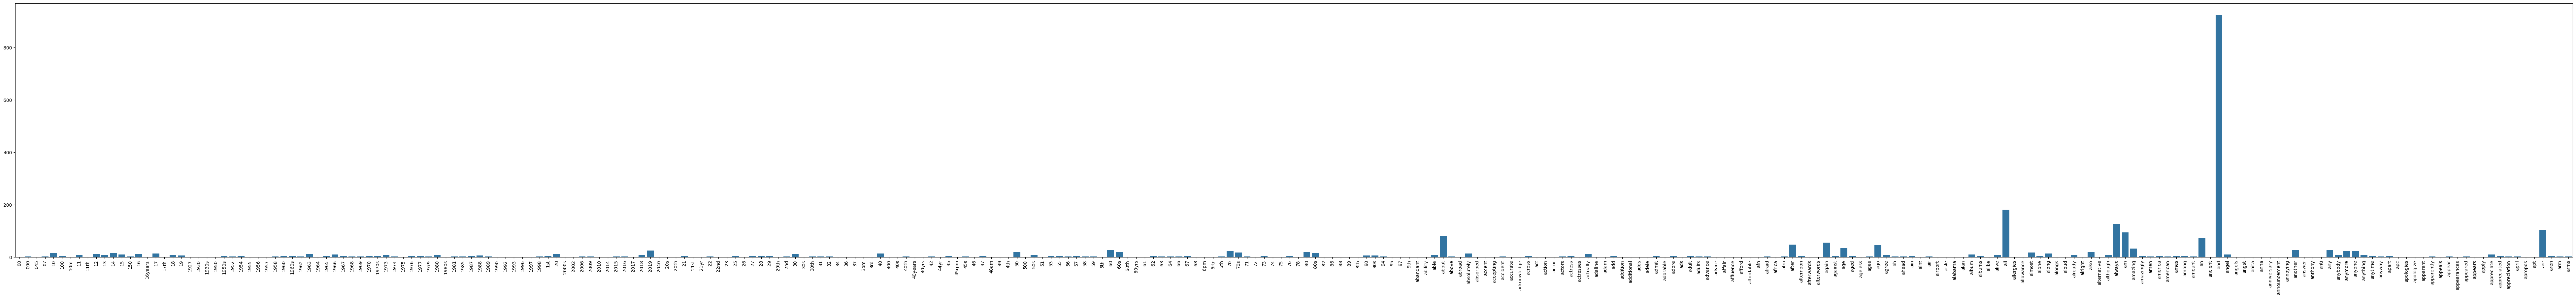

In [79]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [80]:
# plot term frequency

import plotly.express as px
import plotly.graph_objects as go

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fig = go.Figure(data=[
    go.Bar(
        x=count_vect.get_feature_names_out()[:300],
        y=term_frequencies[:300],
        hovertemplate="<br>".join([
            "Term: %{x}",
            "Frequency: %{y}",
        ])
    )
])

fig.update_layout(
    title='Term Frequencies',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis_tickangle=-45,
    height=600,
    width=1200,
    showlegend=False,
    bargap=0.2
)

fig.show()

In [81]:
min_freq = 5
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
mask = term_frequencies >= min_freq
filtered_terms = count_vect.get_feature_names_out()[mask]
filtered_frequencies = term_frequencies[mask]

sorted_indices = np.argsort(-filtered_frequencies)
sorted_terms = filtered_terms[sorted_indices]
sorted_frequencies = filtered_frequencies[sorted_indices]

N = 100
fig = px.bar(
    x=sorted_terms[:N],
    y=sorted_frequencies[:N],
    title=f'Top {N} Terms (Min Frequency: {min_freq})'
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=500,
    width=800
)
fig.show()

In [82]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

min_freq = 5
mask = term_frequencies >= min_freq
filtered_terms = count_vect.get_feature_names_out()[mask]
filtered_frequencies = term_frequencies[mask]

sorted_indices = np.argsort(-filtered_frequencies)
sorted_terms = filtered_terms[sorted_indices]
sorted_frequencies = filtered_frequencies[sorted_indices]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(len(sorted_frequencies))),
    y=sorted_frequencies,
    mode='lines+markers',
    line=dict(width=2, color='rgb(31, 119, 180)'),
    marker=dict(size=6),
    hovertemplate="<br>".join([
        "Rank: %{x}",
        "Term: %{text}",
        "Frequency: %{y}",
        "<extra></extra>"
    ]),
    text=sorted_terms
))

fig.update_layout(
    title='Term Frequency Distribution (Linear Scale)',
    xaxis_title='Term Rank (by frequency)',
    yaxis_title='Frequency',
    height=600,
    width=1000,
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )
)

fig.show()

In [83]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each sentiment
sentiments = ['nostalgia', 'not nostalgia']  
sentiment_dfs = {} 

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = X[X['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for s in sentiments:
    filt_term_document_dfs[s] = create_term_document_df(sentiment_dfs[s])

In [84]:
sentiment_number=0
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
filt_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

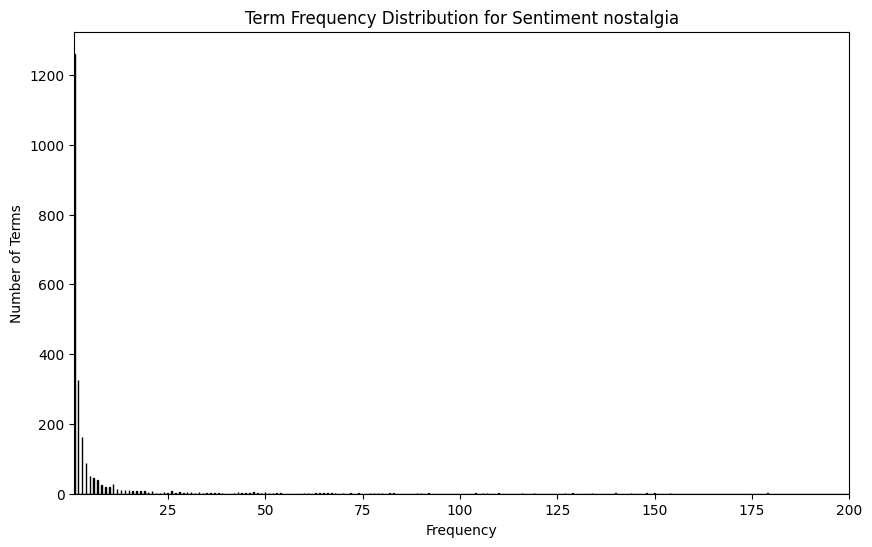

In [85]:
sentiment_number=0
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [86]:
sentiment_number = 1
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name 
                 for i in top_5_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Sentiment: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'not', 'be', 'what', 'can', 'me', 'voice', 'just', 'as', 'songs', 'beautiful', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'much', 'about', 'never', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'singer', 'an', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'man', 'video', 'some', 'heard', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those'

In [87]:
sorted_counts

array([708, 451, 451, ...,   1,   1,   1])

In [88]:
sorted_indices

array([2276, 2290,  160, ..., 1509, 1510,    0])

In [89]:
filt_term_document_dfs[sentiments[sentiment_number]].loc[:,'this'].sum(axis=0)

np.int64(451)

In [90]:
sentiment_number = 0  # You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for sentiment in sentiments:
    print(f'\nFor sentiment {sentiment} we filter the following words:')
    # Use the sentiment string as the key, not the entire sentiments list
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment])

# Example: Display the filtered DataFrame for one of the sentiments
print(f"\nFiltered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
print(term_document_dfs[sentiments[sentiment_number]])


For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row            1
ronnie         1
rpg            1
ruined         1
rules          1
running        1
sadder         1
saddest        1
glimpses       1
safer          1
rubbish        1
grabbed        1
grace          1
romanticism    1
rightly        1
dtype: int64
Top 5.0% words: 
takes         30
little        30
singing       31
wonderful     31
makes         31
            ... 
and          472
to           543
this         545
my           566
the          643
Length: 114, dtype: int64

For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1

In [91]:
from PAMI.extras.convert.DF2DB import DF2DB

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_safe = sentiment.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


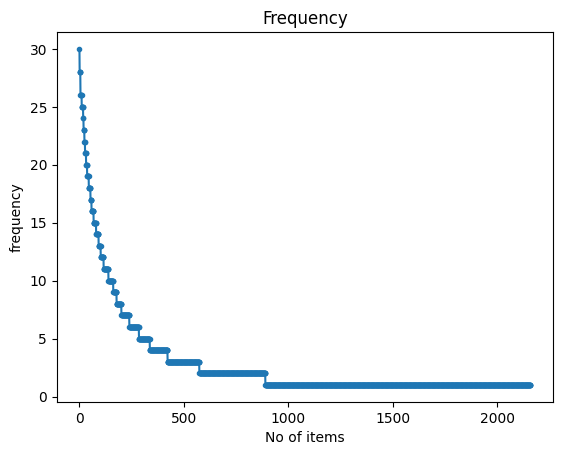

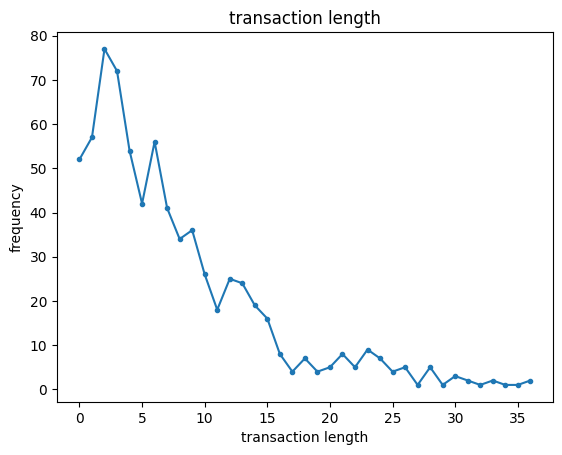

In [92]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 744
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.416666666666666
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.952413594380544
Variance in Transaction Sizes : 35.47891431135038
Sparsity : 0.996559007904061


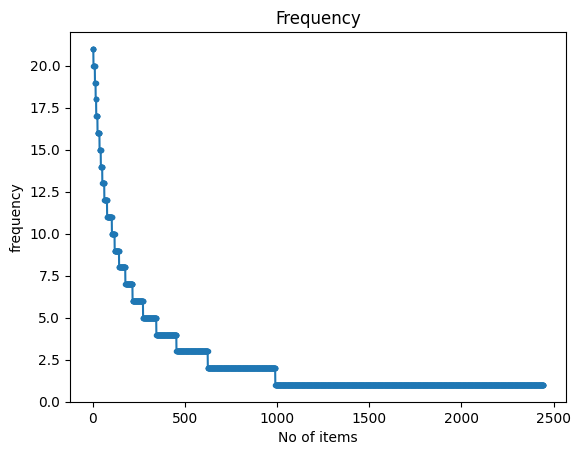

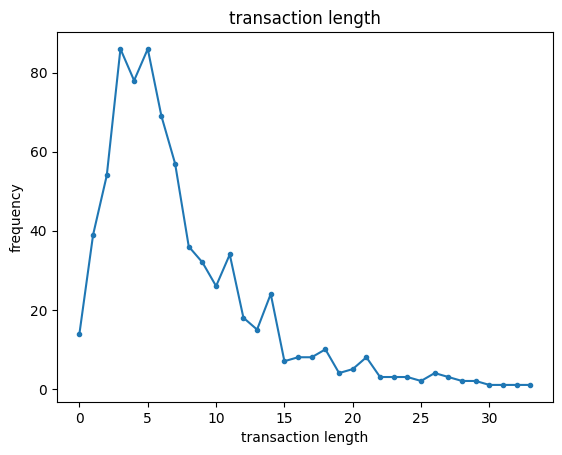

In [93]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [94]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.006303071975708008


In [95]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [96]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.006124019622802734


In [97]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [98]:
import pandas as pd

# We combine the term-document dataframes for both sentiments
dfs = []
for sentiment in sentiments:
    # Create a DataFrame with a 'Patterns' column from the terms
    df = pd.DataFrame({
        'Patterns': term_document_dfs[sentiment].columns,
        'Support': term_document_dfs[sentiment].sum(axis=0),  # Sum frequencies as Support
        'Category': sentiment
    })
    dfs.append(df)

# Identify patterns that appear in more than one category
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print("Patterns unique to each category:")
print(final_pattern_df)
print(f"\nNumber of patterns discarded (appearing in multiple categories): {discarded_patterns_count}")

Patterns unique to each category:
       Patterns  Support       Category
1128       will       30      nostalgia
388        ever       29      nostalgia
1148      would       29      nostalgia
778          or       28      nostalgia
81        about       28      nostalgia
...         ...      ...            ...
1252  arranging        1  not nostalgia
1251  arrangers        1  not nostalgia
368     edwards        1      nostalgia
369         egg        1      nostalgia
2612      zulus        1  not nostalgia

[2613 rows x 3 columns]

Number of patterns discarded (appearing in multiple categories): 1992


In [99]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  asleep  arts  \
0      0    0    0   0   0    0    0   0     0   0  ...       0     0   
1      0    0    0   0   0    0    0   0     0   0  ...       0     0   
2      0    0    0   0   0    0    0   0     0   0  ...       0     0   
3      0    0    0   0   0    0    0   0     0   0  ...       0     0   
4      0    0    0   0   0    0    0   0     0   0  ...       0     0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...   ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0     0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0     0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0     0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0     0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0     0   

      artistically  arte  eckstein  arranging  arrangers  edwards  egg  zulus  
0                0     0         0          0          0        0    0      0  
1                0     0         0          0          0        0    0      0  
2                0     0         0          0          0        0    0      0  
3                0     0         0          0          0        0    0      0  
4                0     0         0          0          0        0    0      0  
...            ...   ...       ...        ...        ...      ...  ...    ...  
1495             0     0         0          0          0        0    0      0  
1496             0     0         0          0          0        0    0      0  
1497             0     0         0          0          0        0    0      0  
1498             0     0         0          0          0        0    0      0  
1499             0     0         0          0          0        0    0      0  

[1498 rows x 6343 columns]

In [100]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate pattern matrices for each sentiment
pattern_matrices = {}

for sentiment in sentiments:
    # Get the relevant data for this sentiment
    sentiment_data = sentiment_dfs[sentiment]
    
    # Tokenize the comments into sets of unique words
    sentiment_data['tokenized_text'] = sentiment_data['comment'].str.split().apply(set)
    
    # Get patterns specific to this sentiment from final_pattern_df
    sentiment_patterns = final_pattern_df[final_pattern_df['Category'] == sentiment]['Patterns']
    
    # Initialize the pattern matrix for this sentiment
    pattern_matrix = pd.DataFrame(0, index=sentiment_data.index, 
                                columns=sentiment_patterns)
    
    # Iterate over each pattern and check if all words in the pattern are present
    for pattern in sentiment_patterns:
        pattern_words = set(pattern.split())  # Tokenize pattern into words
        pattern_matrix[pattern] = sentiment_data['tokenized_text'].apply(
            lambda x: 1 if pattern_words.issubset(x) else 0)
    
    # Get the term-document matrix for this sentiment
    sentiment_tdm = filt_term_document_dfs[sentiment]
    
    # Concatenate the original TDM and the pattern matrix to augment the features
    augmented_df = pd.concat([sentiment_tdm, pattern_matrix], axis=1)
    
    # Store the augmented matrix
    pattern_matrices[sentiment] = augmented_df

# Print results
for sentiment in sentiments:
    print(f"\nAugmented matrix for {sentiment}:")
    print(f"Shape: {pattern_matrices[sentiment].shape}")
    print("\nFirst few columns:")
    print(pattern_matrices[sentiment].head())


Augmented matrix for nostalgia:
Shape: (1146, 3458)

First few columns:
    07   10   11  11th   12   13   14   15   16   17  ...  enriched  entirety  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       NaN       NaN   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...       0.0       0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0       0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       NaN       NaN   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0       0.0   

   ernie  escape  eighteen  earplug  easter  eckstein  edwards  egg  
0    NaN     NaN       NaN      NaN     NaN       NaN      NaN  NaN  
1    0.0     0.0       0.0      0.0     0.0       0.0      0.0  0.0  
2    0.0     0.0       0.0      0.0     0.0       0.0      0.0  0.0  
3    NaN     NaN       NaN      NaN     NaN       NaN      NaN  NaN  
4    0.0     0.0       0.0      0.0     0.0       0.0      0.0  0.0  

[5 rows x 3458 colu

In [101]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

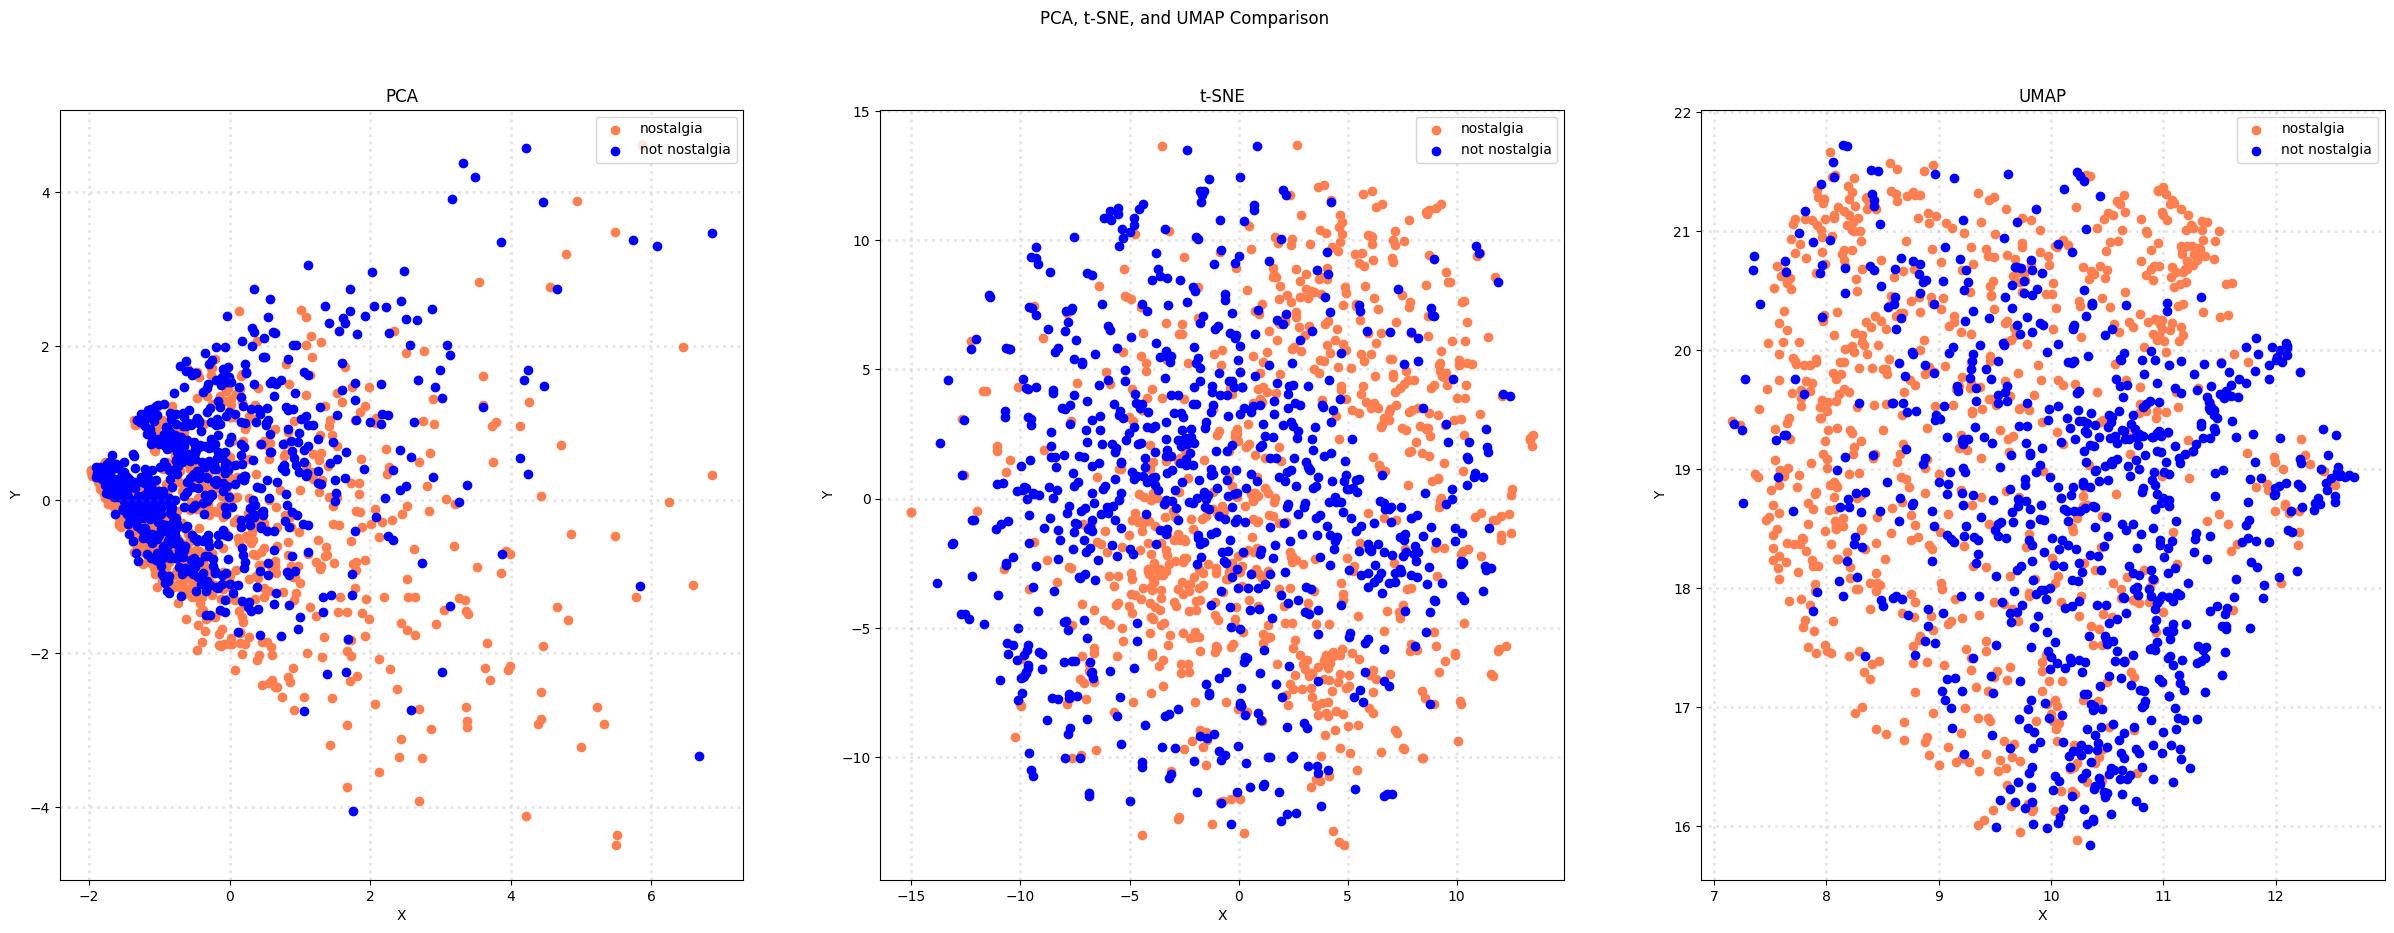

In [102]:
# Plot the results in subplots
col = ['coral', 'blue']
sentiments = ['nostalgia', 'not nostalgia']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [112]:
# fill 0.0 to NaA
augmented_df = augmented_df.fillna(0.0)

X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

IndexError: boolean index did not match indexed array along axis 0; size of axis is 1103 but size of corresponding boolean axis is 1498

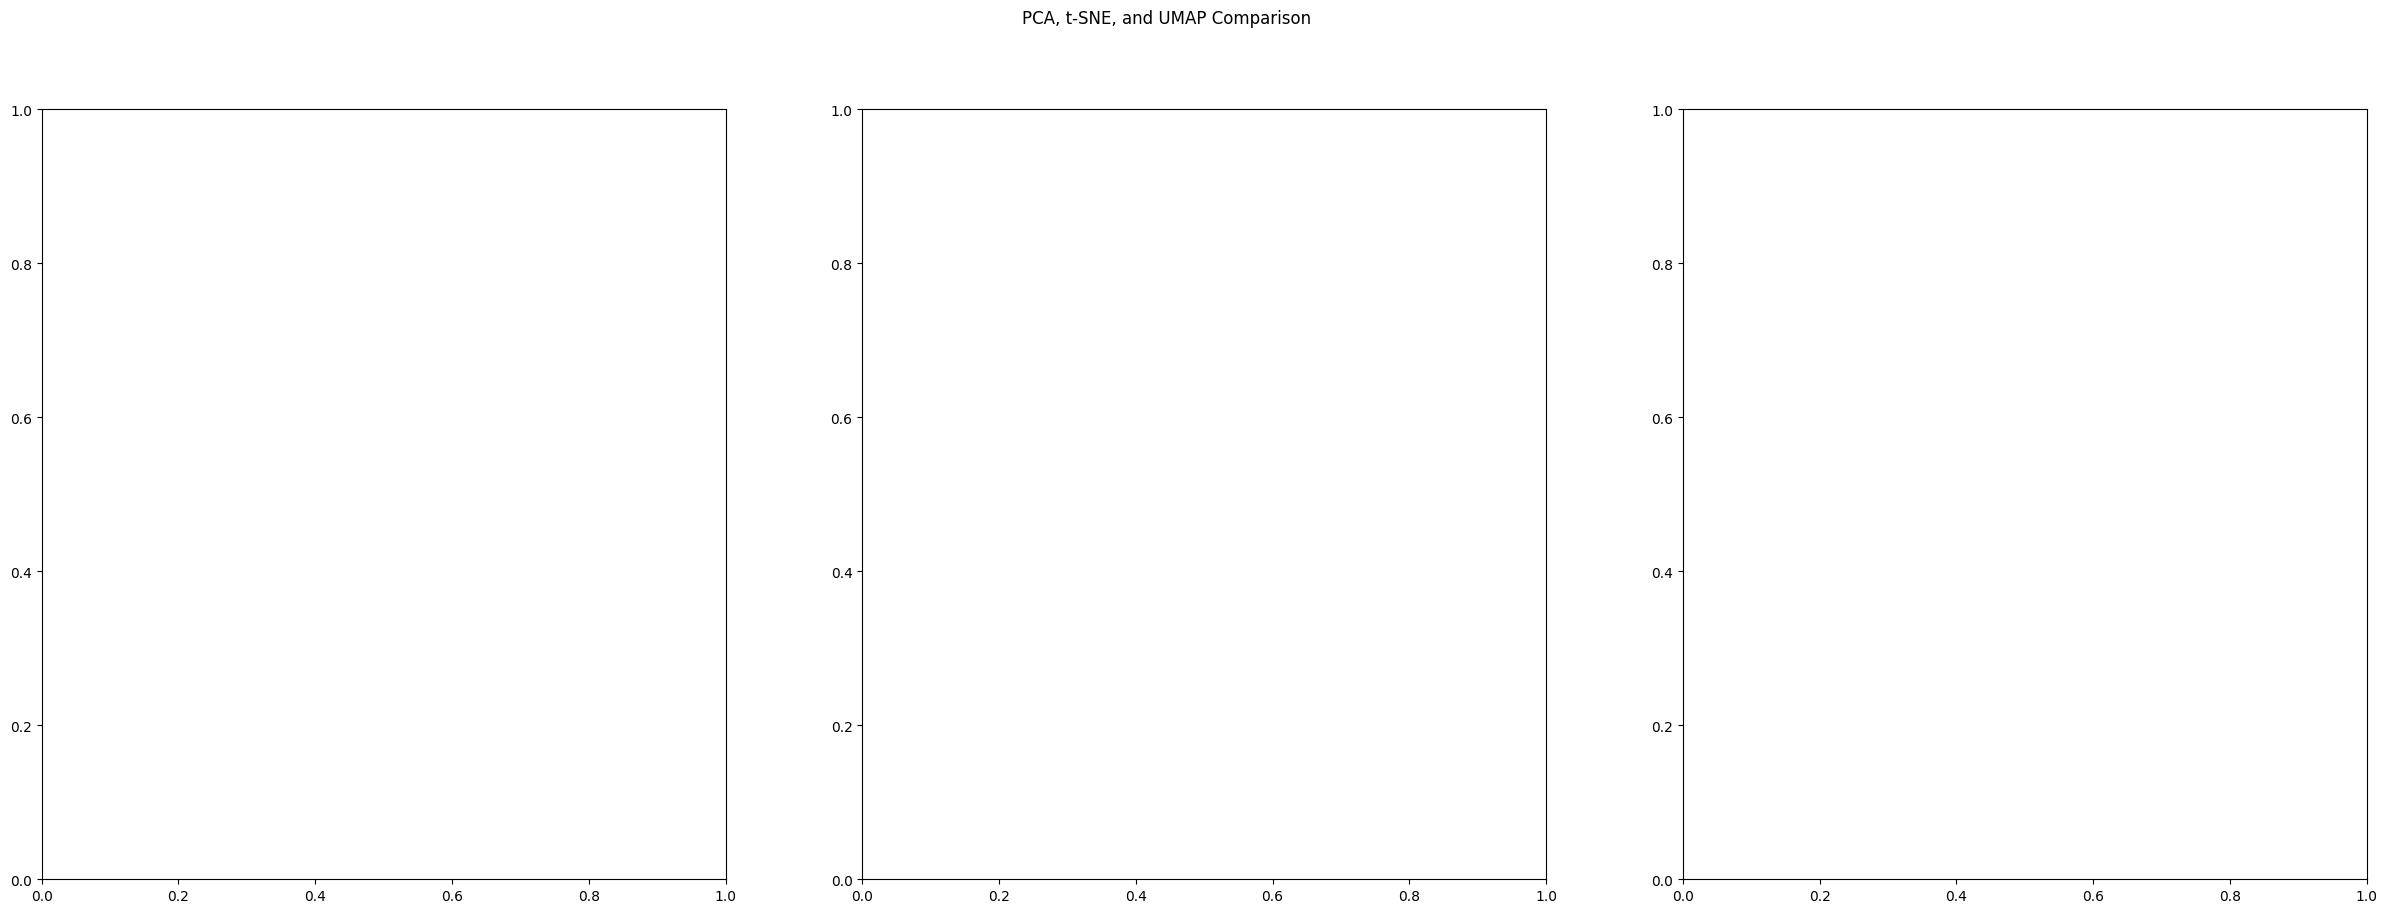

In [113]:
col = ['coral', 'blue']
sentiments = ['nostalgia', 'not nostalgia']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [114]:
# discretization adn binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

comment      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   

  is_nostalgia                                           unigrams  \
0        False  [He, was, a, singer, with, a, golden, voice, t...   
1         True  [The, mist, beautiful, voice, ever, I, listene...   
2         True  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3        False  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4         True  [listening, to, his, songs, reminds, me, of, m...   
5         True  [Every, time, I, heard, this, song, as, a, chi...   
6         True  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7         True  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8        False   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment bin_sentiment  
0  {you, golden, many, can, those, still, You, a,...           [1]  
1  {mist, still, a, was, ever, beautiful, forgott...           [0]  
2  {it, gentle,, --, people, grew, voice,, up, so...           [0]  
3  {you, man, can, a, back, have, my, the, me", p...           [1]  
4  {reminds, mum, everyday, to, me, played, liste...           [0]  
5  {many, it, still, heard, Every, a, Jim, child,...           [0]  
6  {things., it, then,, My, a, changes, Jim, was,...           [0]  
7  {music., 71, a, Jim, i, feeling, ALSO, nostalg...           [0]  
8        {you, always, in, Wherever, are, heart, my}           [1]

In [115]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [116]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [117]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)[0][0]
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)[0][0]
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)[0][0]

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)[0][0]
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)[0][0]
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)[0][0]

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Part 3

#### Data visualization

In [118]:
!pip install wordcloud matplotlib pandas


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chinhuichu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chinhuichu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


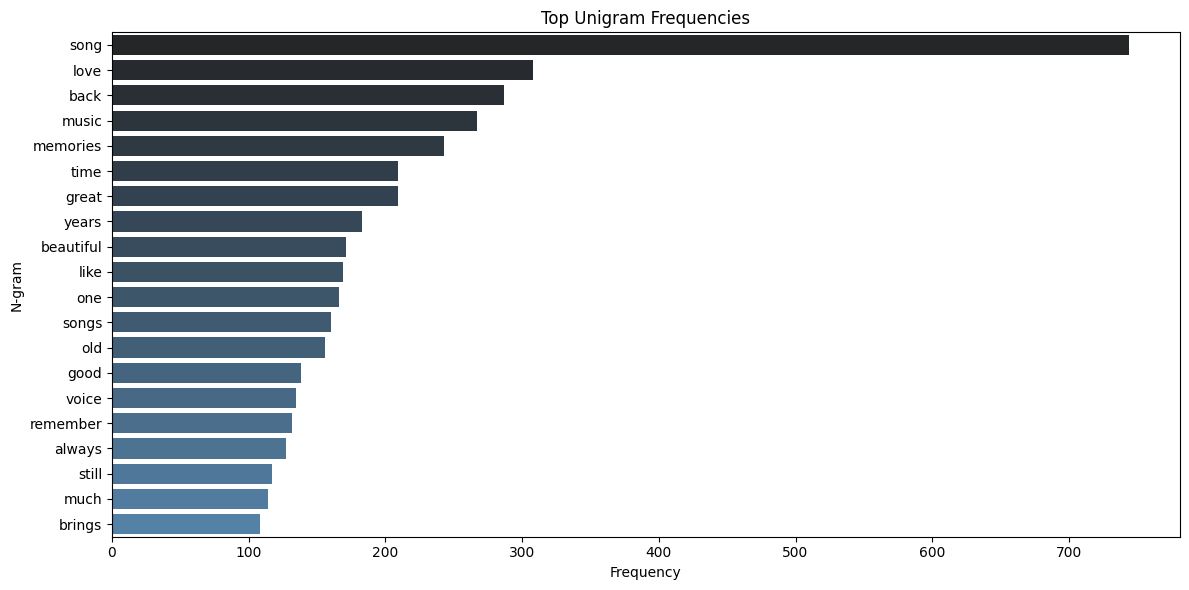

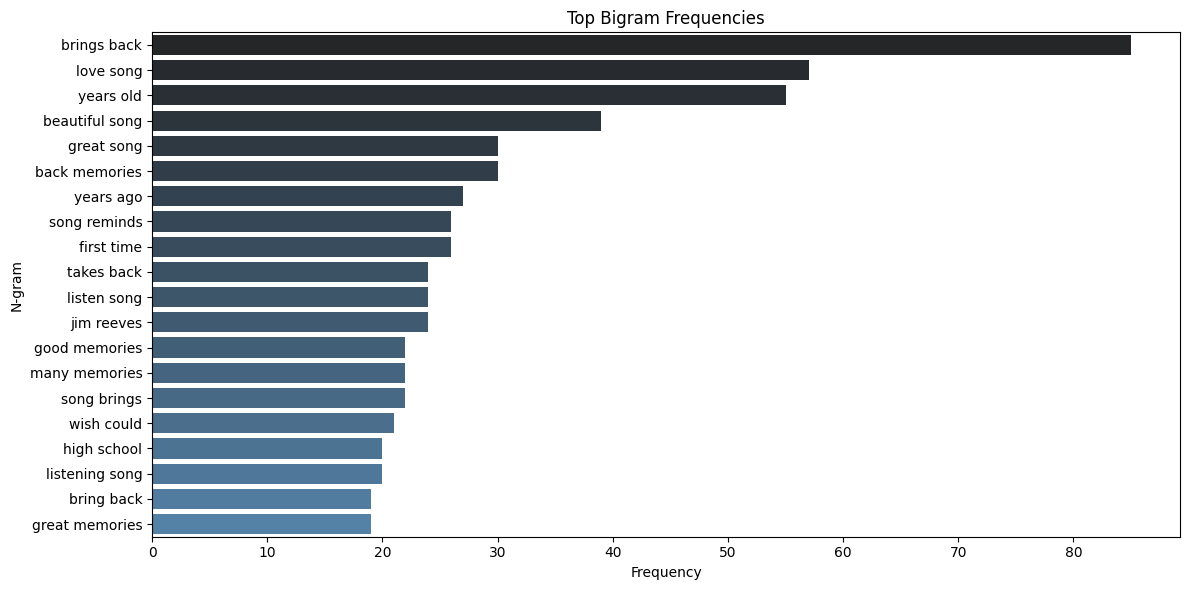

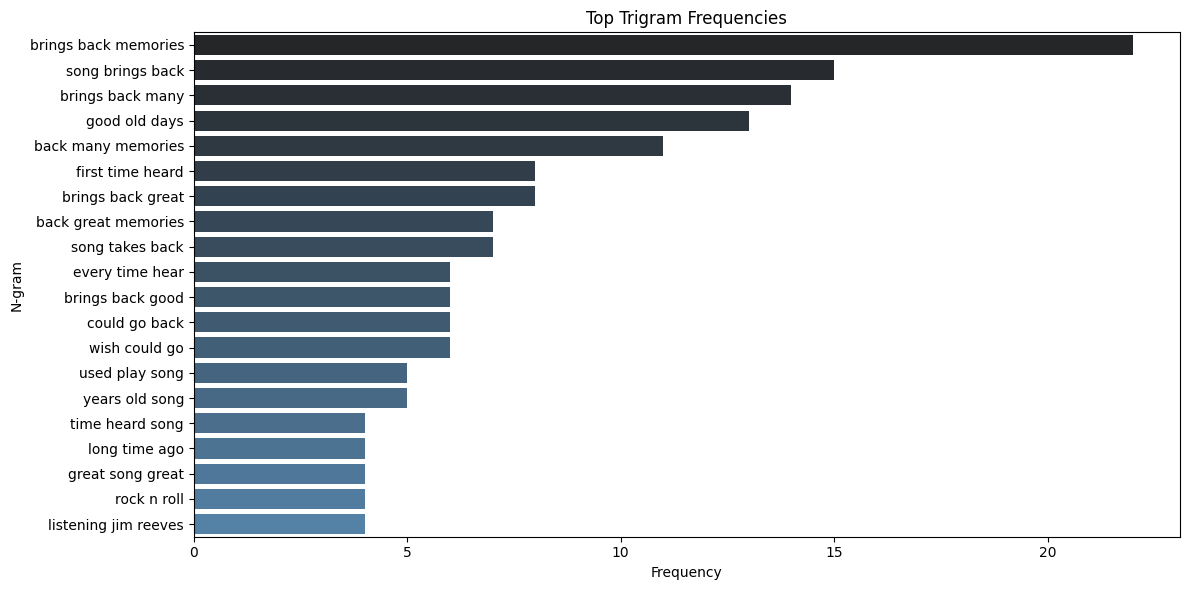

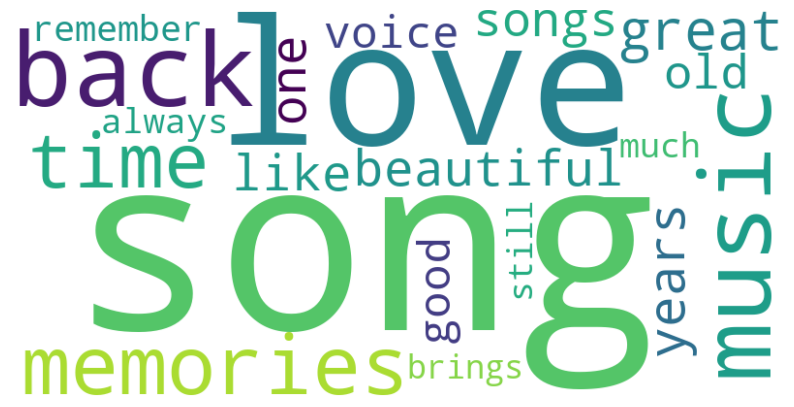

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk import ngrams
import nltk
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

def get_ngram_frequencies(text_data, n, top_k=20):
    all_ngrams = []
    for text in text_data:
        tokens = preprocess_text(text)
        text_ngrams = list(ngrams(tokens, n))
        all_ngrams.extend(text_ngrams)
    
    ngram_freq = Counter(all_ngrams)
    df_ngrams = pd.DataFrame.from_dict(ngram_freq, orient='index', columns=['frequency'])
    df_ngrams.index = df_ngrams.index.map(' '.join)
    df_ngrams = df_ngrams.sort_values('frequency', ascending=False)
    return df_ngrams.head(top_k)

def plot_ngram_distribution(df_ngrams, title=None, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    plot_df = df_ngrams.reset_index()
    plot_df.columns = ['ngram', 'frequency']
    sns.barplot(data=plot_df, x='frequency', y='ngram', hue='ngram', legend=False, palette='dark:steelblue')
    plt.title(title or f'Top {len(df_ngrams)} N-gram Frequencies')
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.tight_layout()
    return plt

def generate_wordcloud(df_ngrams, figsize=(10, 6)):
    wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=0.7)
    frequencies = df_ngrams['frequency'].to_dict()
    wordcloud.generate_from_frequencies(frequencies)
    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    return plt

comments = X['comment']

# Generate and plot unigrams
unigram_freq = get_ngram_frequencies(comments, n=1)
plot_ngram_distribution(unigram_freq, "Top Unigram Frequencies")
plt.show()

# Generate and plot bigrams
bigram_freq = get_ngram_frequencies(comments, n=2)
plot_ngram_distribution(bigram_freq, "Top Bigram Frequencies")
plt.show()

# Generate and plot trigrams
trigram_freq = get_ngram_frequencies(comments, n=3)
plot_ngram_distribution(trigram_freq, "Top Trigram Frequencies")
plt.show()

# Generate word cloud for unigrams
generate_wordcloud(unigram_freq)
plt.show()

In [121]:
!pip install spacy
!python -m spacy download en_core_web_sm

/Users/chinhuichu/Documents/DM2024-Lab1-Homework/dm_hw1/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.2 MB/s eta 0:00:00 MB/s eta 0:00:0101
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Processing texts: 100%|███████████████████████████████████████████████████| 1498/1498 [00:04<00:00, 320.43it/s]


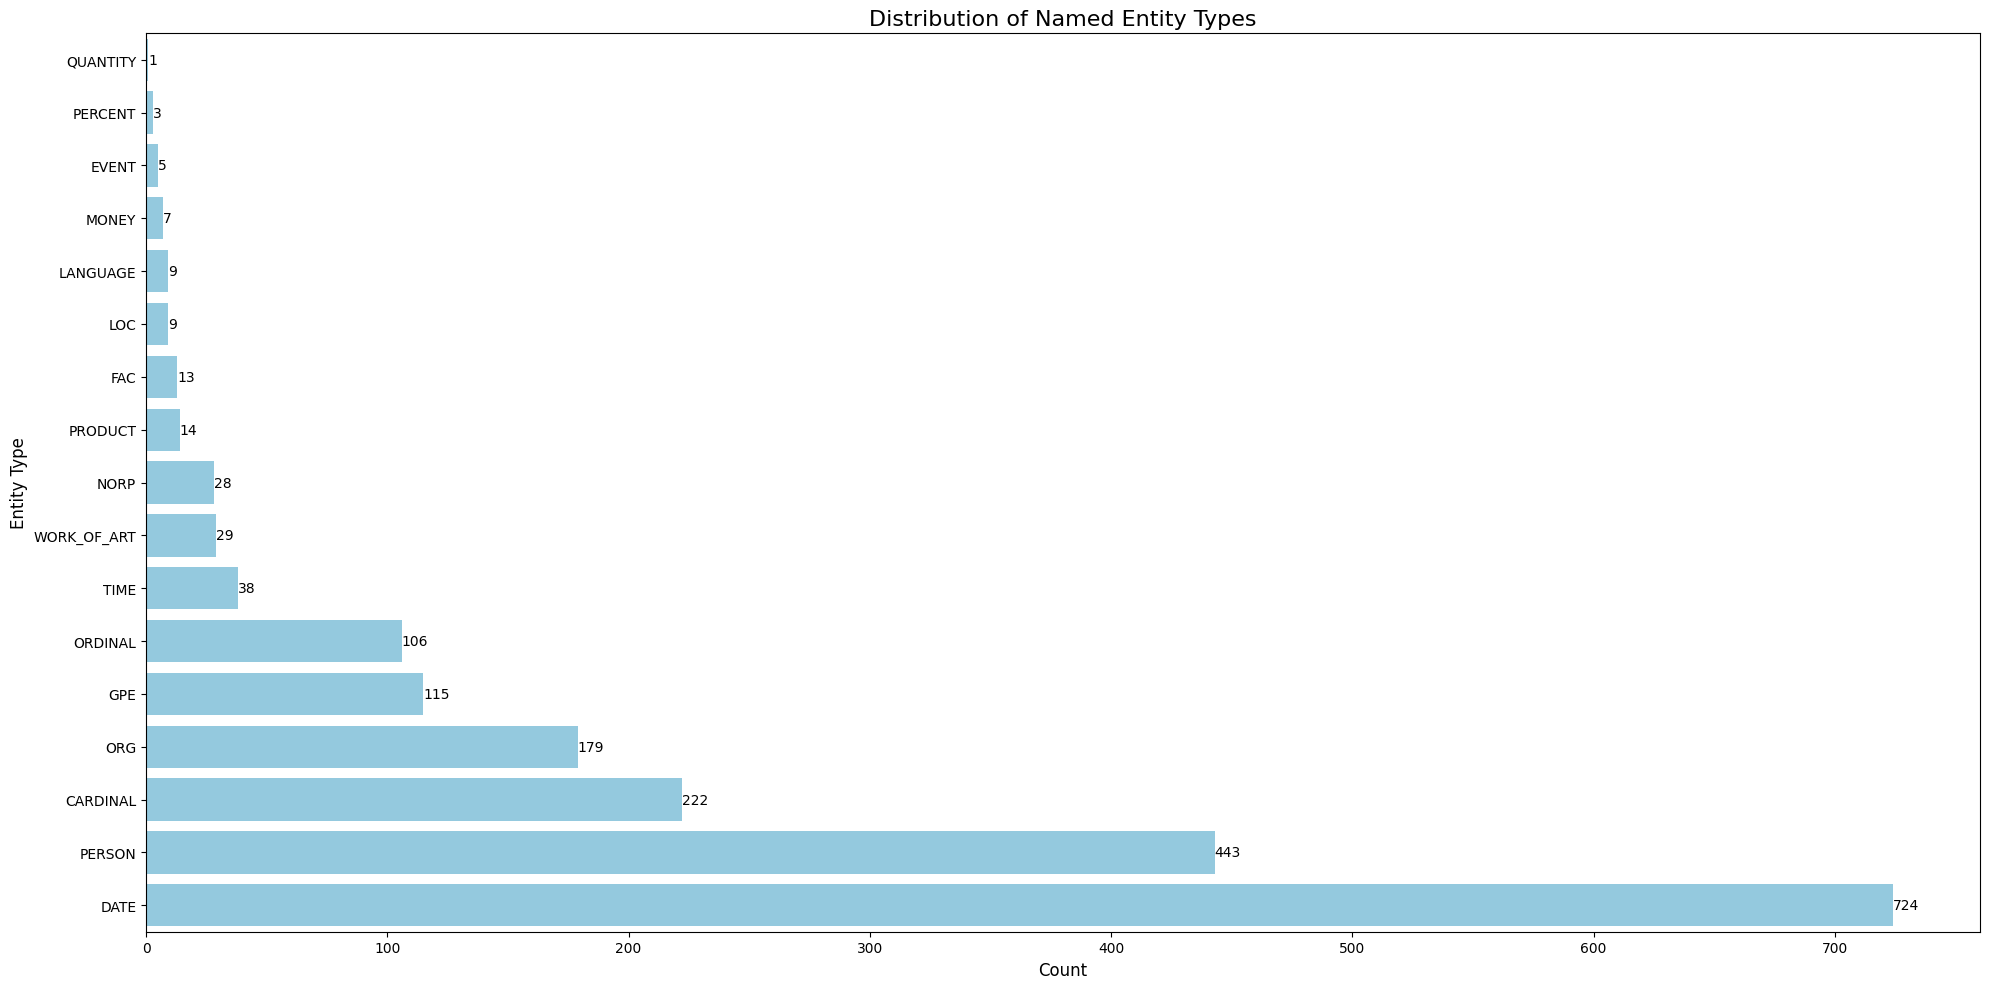

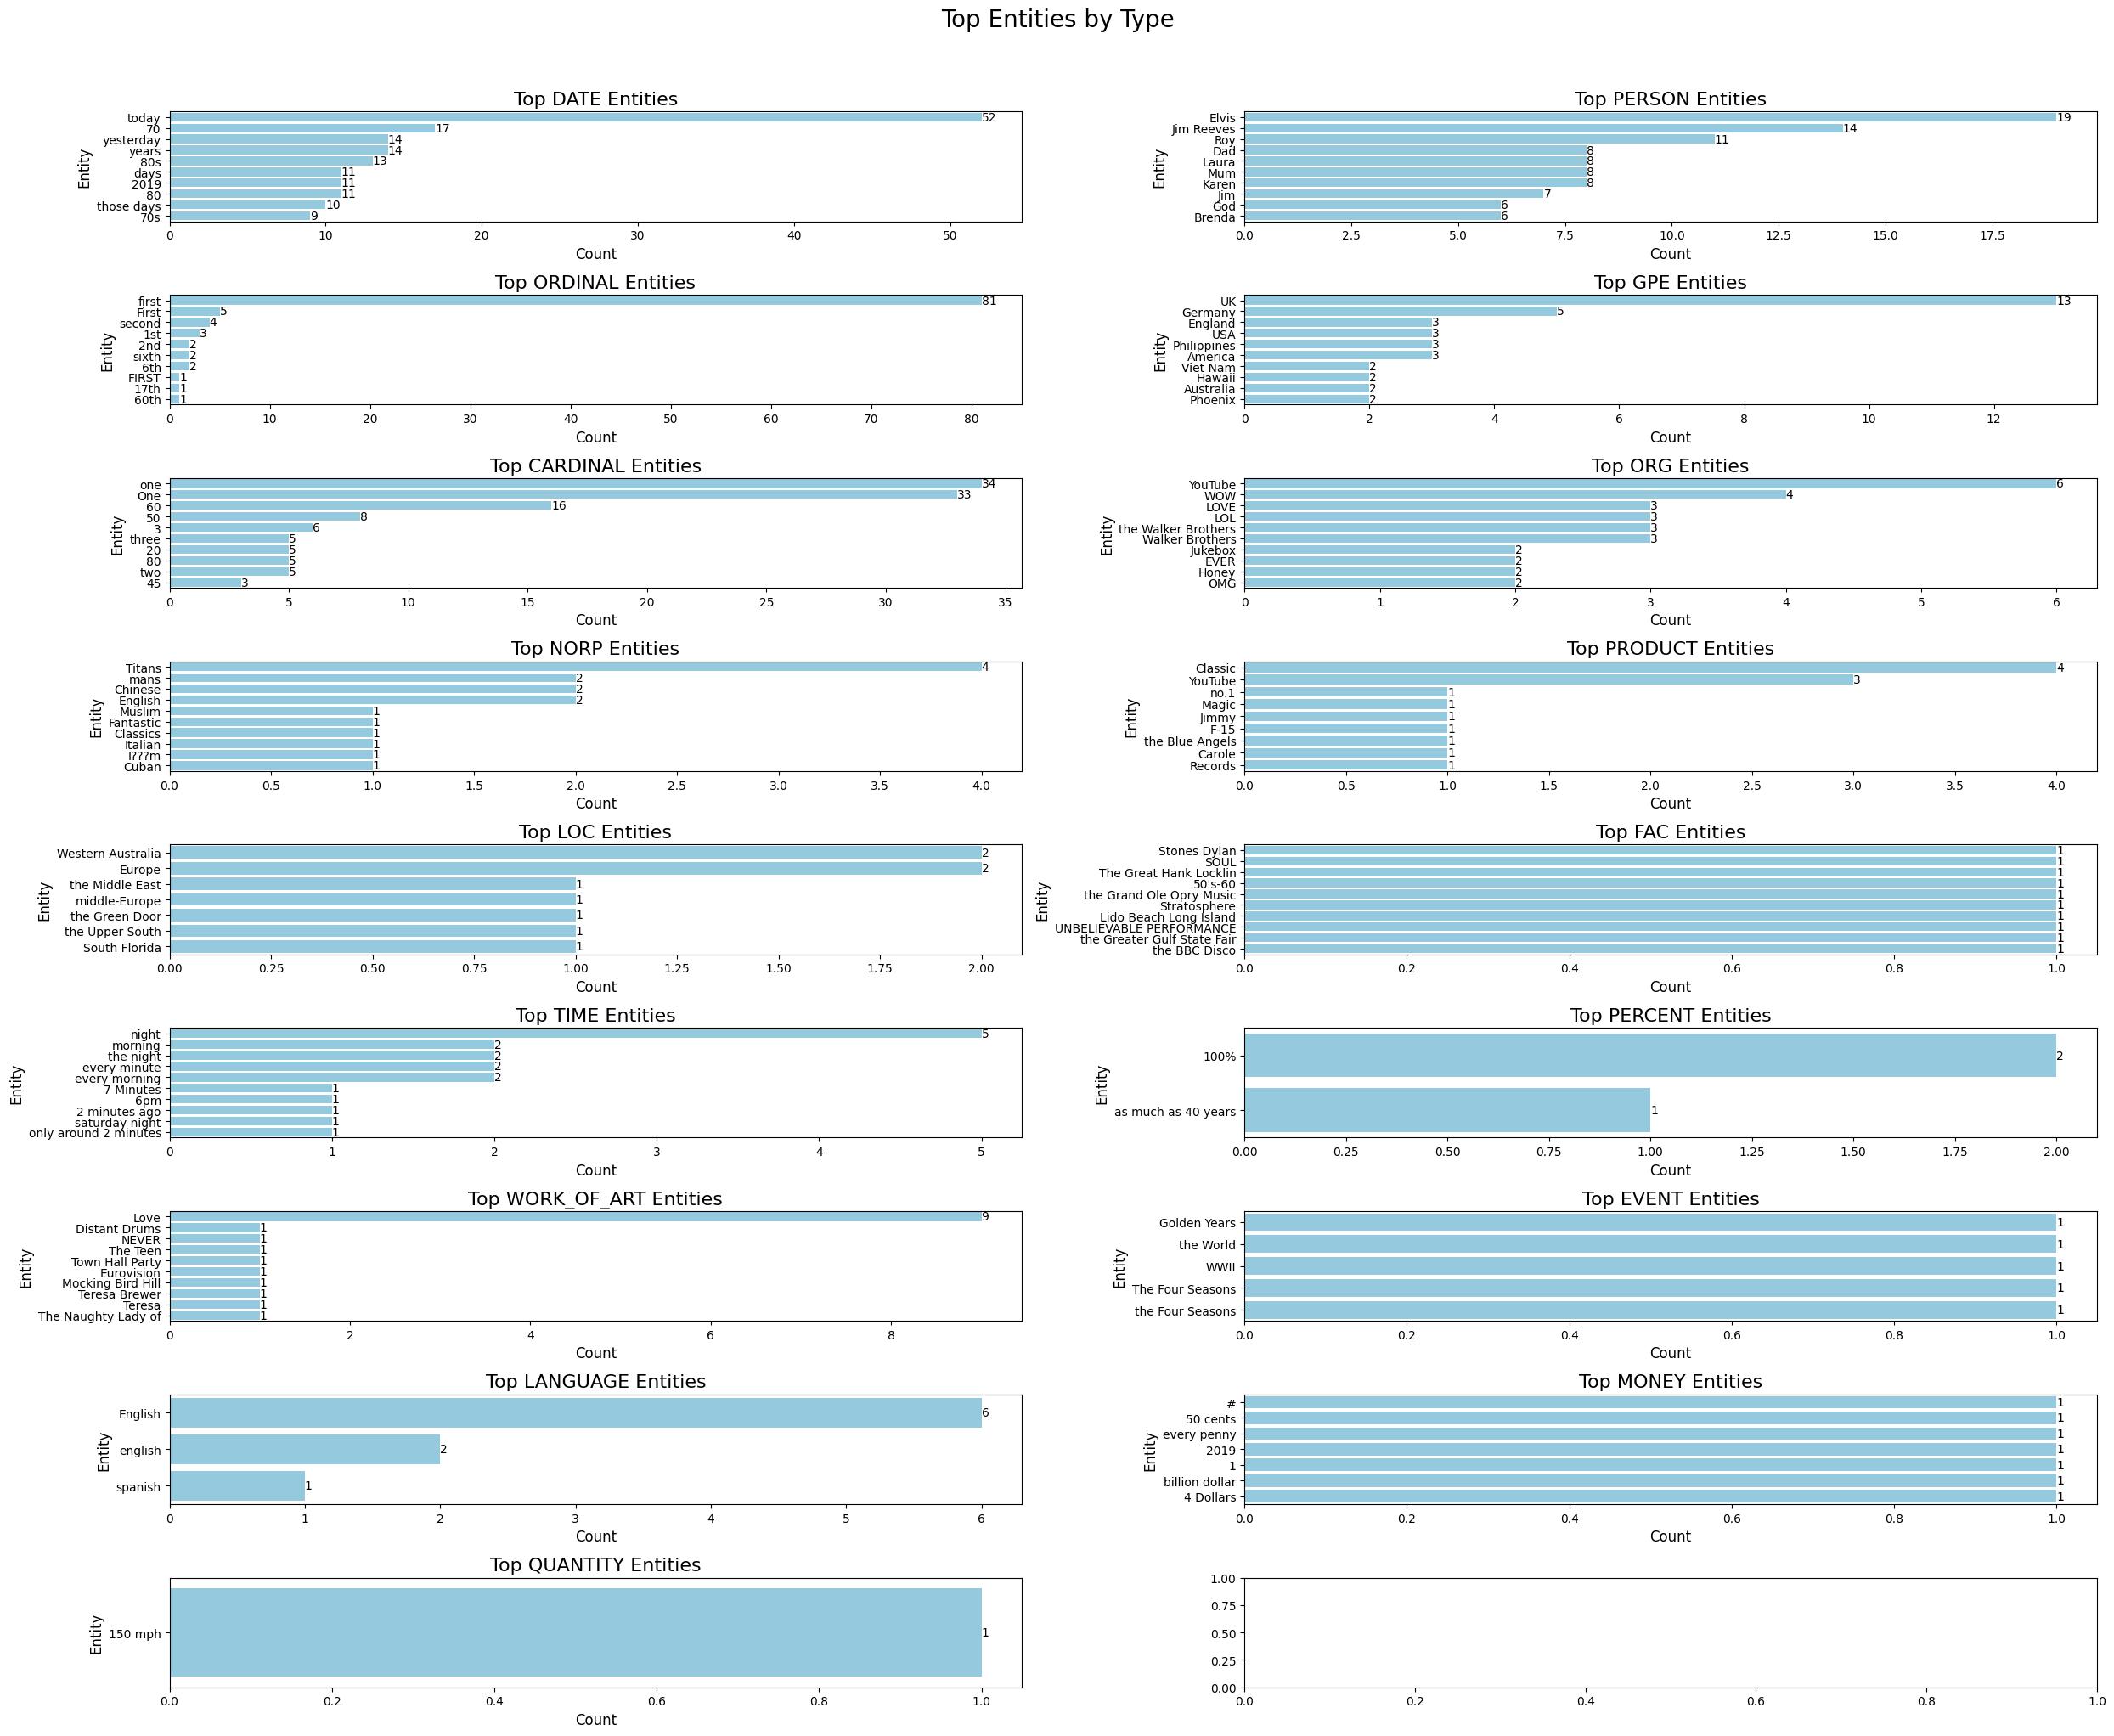

In [122]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from spacy import displacy
from IPython.display import HTML
import en_core_web_sm
from tqdm import tqdm

# Load SpaCy model
nlp = en_core_web_sm.load()

def perform_ner(texts):
    entities = []
    entity_labels = []
    
    for text in tqdm(texts, desc="Processing texts"):
        if isinstance(text, str):
            doc = nlp(text)
            for ent in doc.ents:
                entities.append((ent.text, ent.label_))
                entity_labels.append(ent.label_)
    
    return entities, entity_labels

def analyze_entities(entities, entity_labels):
    # Entity type distribution
    label_dist = Counter(entity_labels)
    
    # Entity text frequency for each type
    entity_by_type = {}
    for text, label in entities:
        if label not in entity_by_type:
            entity_by_type[label] = Counter()
        entity_by_type[label][text] += 1
    
    return label_dist, entity_by_type

def plot_entity_distribution(label_dist, figsize=(20, 10)):
    plt.figure(figsize=figsize)
    
    df = pd.DataFrame.from_dict(label_dist, orient='index', columns=['count'])
    df = df.sort_values('count', ascending=True)
    
    ax = sns.barplot(data=df.reset_index(), x='count', y='index', color='skyblue')
    plt.title('Distribution of Named Entity Types', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Entity Type', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add value labels on the bars
    for i in ax.containers:
        ax.bar_label(i, fontsize=10)
    
    plt.tight_layout()
    return plt

def plot_top_entities_by_type(entity_by_type, top_n=10, figsize=(25, 20)):
    num_types = len(entity_by_type)
    fig, axes = plt.subplots(nrows=((num_types-1)//2 + 1), ncols=2, figsize=figsize)
    fig.suptitle('Top Entities by Type', fontsize=20, y=1.02)
    
    for idx, (entity_type, counter) in enumerate(entity_by_type.items()):
        row = idx // 2
        col = idx % 2
        
        if num_types > 1:
            ax = axes[row, col]
        else:
            ax = axes
            
        # Get top N entities
        top_entities = dict(counter.most_common(top_n))
        
        # Create bar plot
        if top_entities:
            sns.barplot(x=list(top_entities.values()), 
                       y=list(top_entities.keys()),
                       color='skyblue',
                       ax=ax)
            
            ax.set_title(f'Top {entity_type} Entities', fontsize=16)
            ax.set_xlabel('Count', fontsize=12)
            ax.set_ylabel('Entity', fontsize=12)
            ax.tick_params(axis='both', which='major', labelsize=10)
            
            # Add value labels on the bars
            for i in ax.containers:
                ax.bar_label(i, fontsize=10)
            
    plt.tight_layout()
    return plt

def visualize_ner_in_text(text):
    doc = nlp(text)
    html = displacy.render(doc, style="ent")
    return HTML(html)

def generate_entity_report(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents]
    
    report = {
        'text': text,
        'entities': entities,
        'entity_count': len(entities),
        'entity_types': Counter(ent[1] for ent in entities)
    }
    return report

comments = X['comment']

# Perform NER
entities, entity_labels = perform_ner(comments)

# Analyze entities
label_dist, entity_by_type = analyze_entities(entities, entity_labels)

# Plot entity type distribution
plot_entity_distribution(label_dist)
plt.show()

# Plot top entities by type
plot_top_entities_by_type(entity_by_type)
plt.show()

# Example of detailed analysis for a single comment
sample_text = comments.iloc[0]
report = generate_entity_report(sample_text)

In [124]:
# calculate TF-IDF
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

class TFIDFAnalyzer:
    def __init__(self, min_df=1, max_df=1.0, stop_words='english'):
        self.vectorizer = TfidfVectorizer(
            min_df=min_df,
            max_df=max_df,
            stop_words=stop_words
        )
        self.feature_names = None
        self.tfidf_matrix = None
        self.tfidf_df = None
        
    def fit_transform(self, documents):
        self.tfidf_matrix = self.vectorizer.fit_transform(documents)        
        self.feature_names = self.vectorizer.get_feature_names_out()        
        self.tfidf_df = pd.DataFrame(
            self.tfidf_matrix.toarray(),
            columns=self.feature_names
        )
        
        return self.tfidf_df

documents = X['comment']

# Initialize analyzer
analyzer = TFIDFAnalyzer(
    min_df=1,  
    max_df=1.0,  
    stop_words='english'
)

# Calculate TF-IDF scores
tfidf_scores = analyzer.fit_transform(documents)
print("\nTF-IDF Scores:")
print(tfidf_scores)



TF-IDF Scores:
       00  000  045   07   10  100  10m   11  11th   12  ...  youngster  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...        ...   
1493  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   

      youngsters  youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0      

In [126]:
print("\nNon-zero values in first 5 records:")
for idx in range(5):
    row = tfidf_scores.iloc[idx]
    non_zero_values = row[row != 0]
    if len(non_zero_values) > 0:
        print(f"\nRecord {idx}:")
        print(non_zero_values)


Non-zero values in first 5 records:

Record 0:
16years      0.303244
age          0.191673
days         0.147950
emotional    0.266776
fan          0.259520
feel         0.190485
golden       0.231934
great        0.124378
hear         0.155448
jim          0.190485
life         0.165938
lord         0.259520
love         0.110138
loving       0.231934
reeves       0.201162
relaxed      0.275657
singer       0.174348
singers      0.204347
thank        0.154965
time         0.245703
voice        0.138352
vouch        0.303244
Name: 0, dtype: float64

Record 1:
angel        0.361491
beautiful    0.200197
forgotten    0.380954
kid          0.302243
listened     0.311314
love         0.169136
mist         0.465681
singing      0.264247
voice        0.424924
Name: 1, dtype: float64

Record 2:
17             0.165793
age            0.140736
comforting     0.222657
early          0.145537
forgot         0.195880
gentle         0.391761
graduated      0.195880
great          0.091325
grew    

In [ ]:
# Classification

